In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle
import re

import evaluation

import pandas as pd


/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


In [3]:
# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/MA_DQN1/',
            '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']

# exp_dir = exp_dirs[0]
titles= ['DQN, hiddens=[1024,512,256,32,8]']

# exp_dirs = ['/home/peter/Documents/ML/rl_ipd/more_runs/MA_random_length_DQN2/', 
#             '/home/peter/Documents/ML/rl_ipd/more_runs/MA_random_length_nodoneatend_DQN2/']
# titles=['DQN, hiddens=[1024,512,256,32,8]', 'DQN, hiddens=[1024,512,256,32,8],no done']
exp_dirs = ['MA_random_length_DQN2/', 'MA_random_length_nodoneatend_DQN2/', 'MA_random_length_nodoneatend_DQN2_2/','MA_random_length_DQN3/']
titles = exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(16,15))

    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25,);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


FileNotFoundError: [Errno 2] No such file or directory: 'MA_random_length_DQN2/data_save'

0
MA_random_length_PPO2/
max t4t frac:  0.63
mean t4t frac:  0.4179166666666667
std t4t frac:  0.19178936290165371
1
MA_random_length_PPO2/
max t4t frac:  0.58
mean t4t frac:  0.41083333333333333
std t4t frac:  0.18991043210477462
0
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.63
mean t4t frac:  0.4356666666666666
std t4t frac:  0.1784130662878205
1
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.64
mean t4t frac:  0.4326666666666667
std t4t frac:  0.17766885552122585


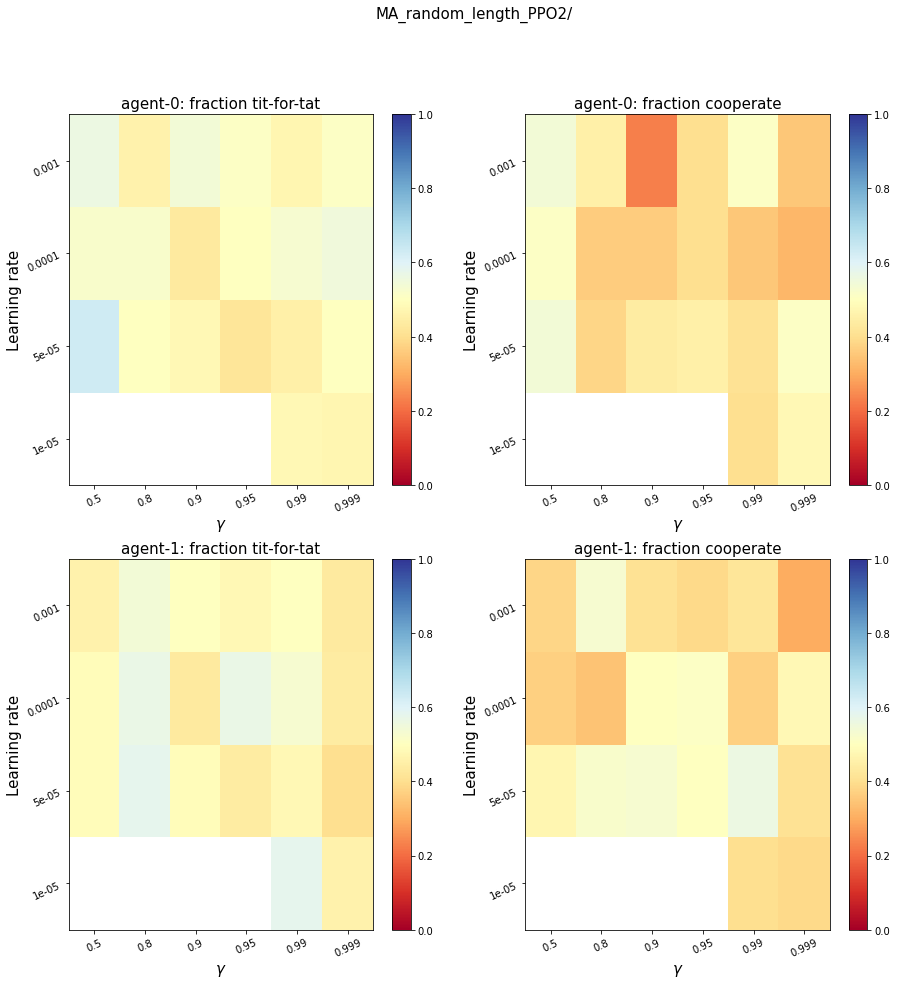

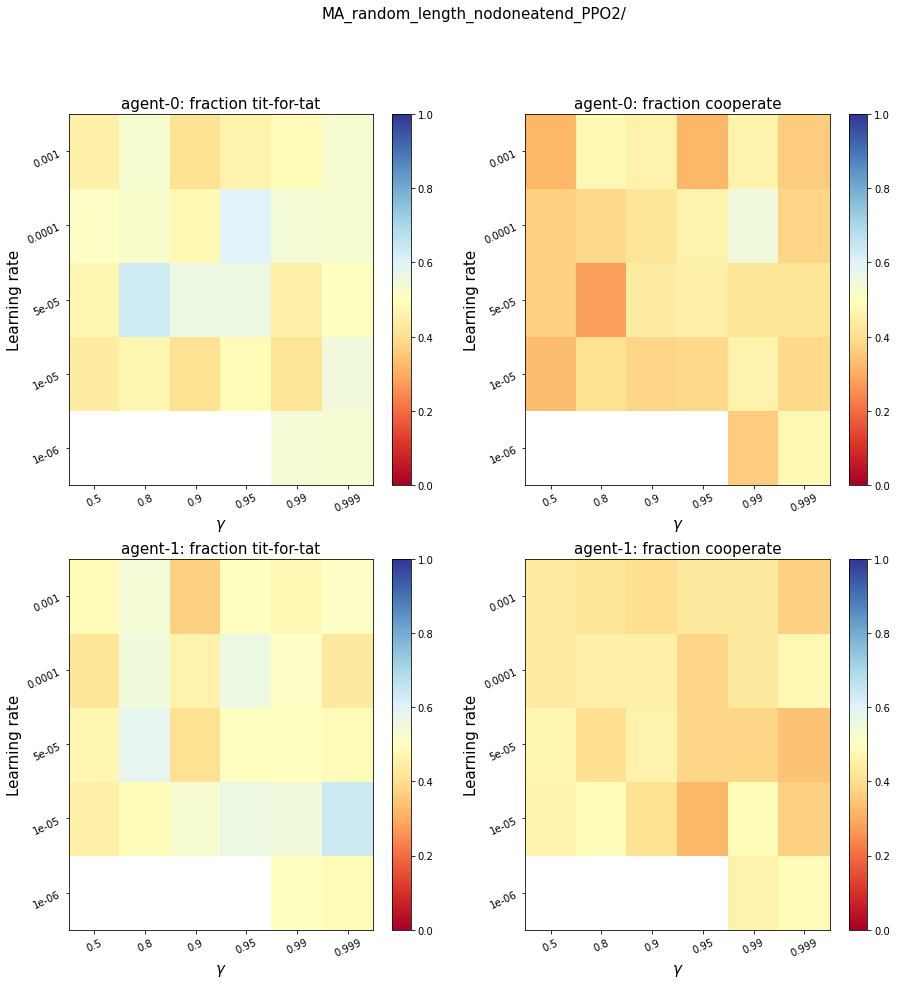

In [4]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

exp_dir = exp_dirs[0]

titles= ['PPO, hiddens=[1024,512,256,32,8]']


base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['MA_random_length_PPO2/', 
            'MA_random_length_nodoneatend_PPO2/']
titles=['PPO, hiddens=[1024,512,256,32,8]', 'PPO, hiddens=[1024,512,256,32,8],no done']
exp_dirs = ['MA_random_length_PPO2/', 'MA_random_length_nodoneatend_PPO2/']
titles= exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(15,15))

    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


MA_random_length_DQN2/
max t4t frac:  0.63
mean t4t frac:  0.4843333333333334
std t4t frac:  0.06151874149846984
MA_random_length_DQN2/
max t4t frac:  0.6
mean t4t frac:  0.49800000000000005
std t4t frac:  0.039949968710876374
MA_random_length_nodoneatend_DQN2_2/
max t4t frac:  0.62
mean t4t frac:  0.5126666666666667
std t4t frac:  0.060107311442859336
MA_random_length_nodoneatend_DQN2_2/
max t4t frac:  0.63
mean t4t frac:  0.5009999999999999
std t4t frac:  0.06128349424328435
MA_random_length_DQN3/
max t4t frac:  0.6
mean t4t frac:  0.517
std t4t frac:  0.0405914605140868
MA_random_length_DQN3/
max t4t frac:  0.59
mean t4t frac:  0.5013333333333334
std t4t frac:  0.05530119548637463


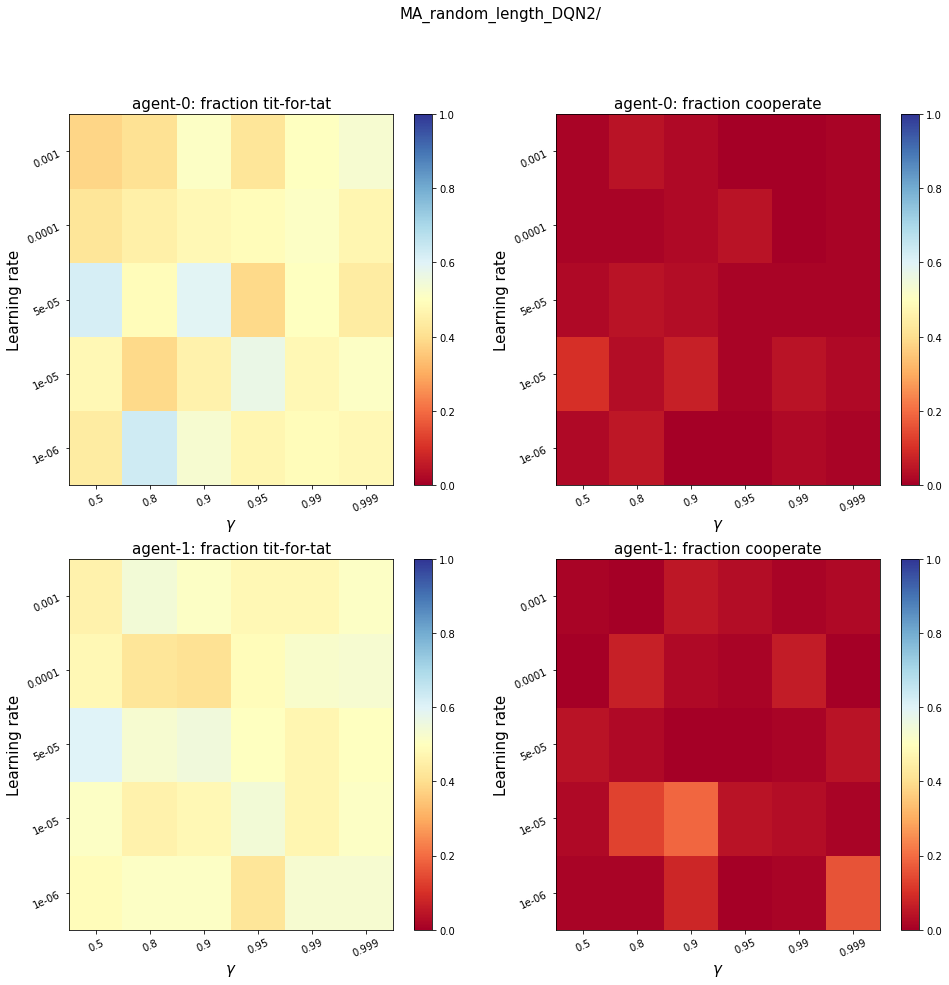

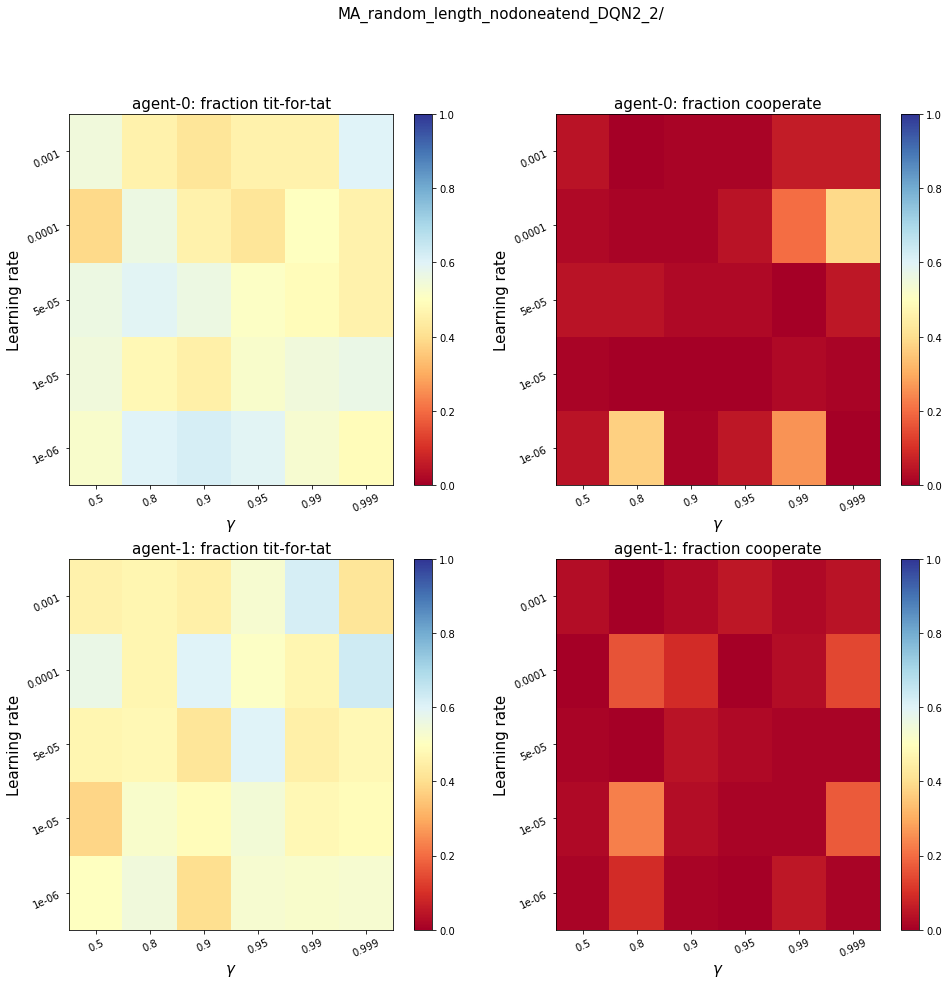

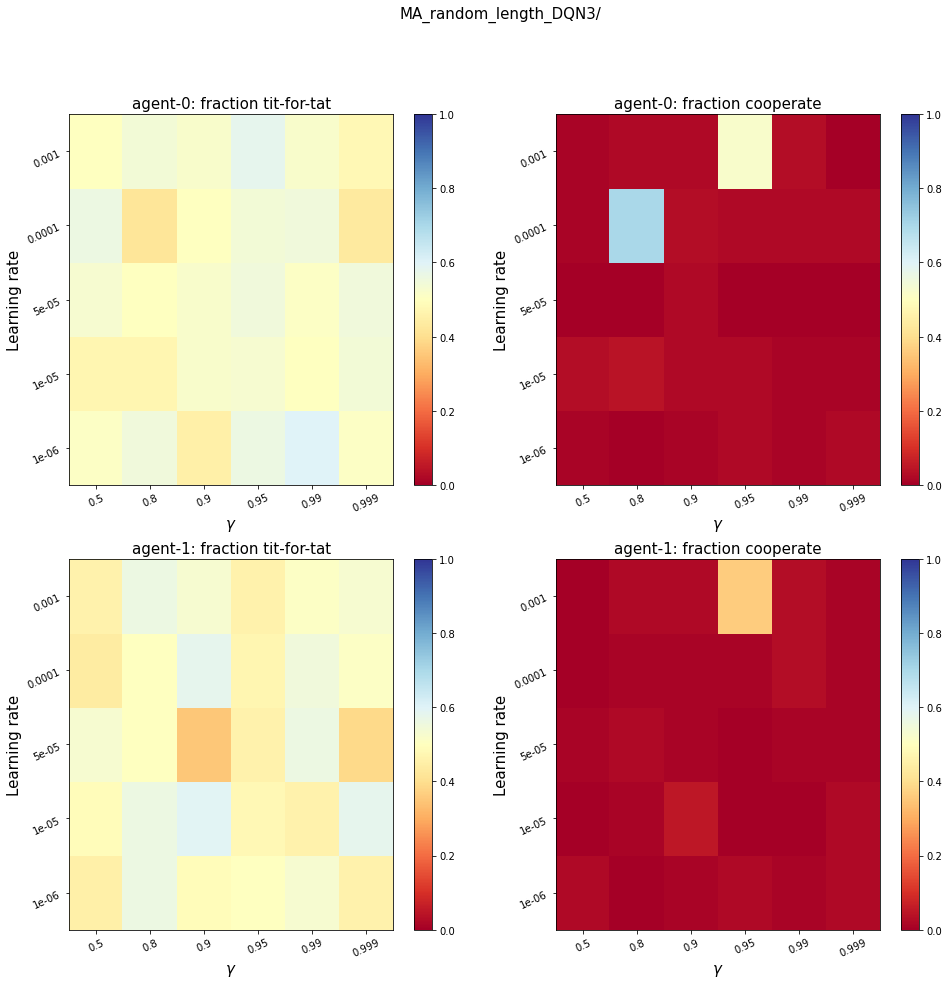

In [5]:
# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/MA_DQN1/',
            '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_no_done_at_end1/MA_DQN_no_done_at_end1/']
exp_dir = exp_dirs[0]
titles= ['DQN, hiddens=[1024,512,256,32,8]']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['MA_random_length_DQN2/', 
            'MA_random_length_nodoneatend_DQN2/']
titles=['DQN, hiddens=[1024,512,256,32,8]', 'DQN, hiddens=[1024,512,256,32,8],no done']

exp_dirs = ['MA_random_length_DQN2/', 'MA_random_length_nodoneatend_DQN2/', 'MA_random_length_nodoneatend_DQN2_2/','MA_random_length_DQN3/']
exp_dirs = ['MA_random_length_DQN2/', 'MA_random_length_nodoneatend_DQN2_2/','MA_random_length_DQN3/']


titles = exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(16,15))

    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25,);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


0
MA_PPO2/
max t4t frac:  1.0
mean t4t frac:  0.58
std t4t frac:  0.18108929657308112
1
MA_PPO2/
max t4t frac:  1.0
mean t4t frac:  0.6046666666666668
std t4t frac:  0.1723123778361716


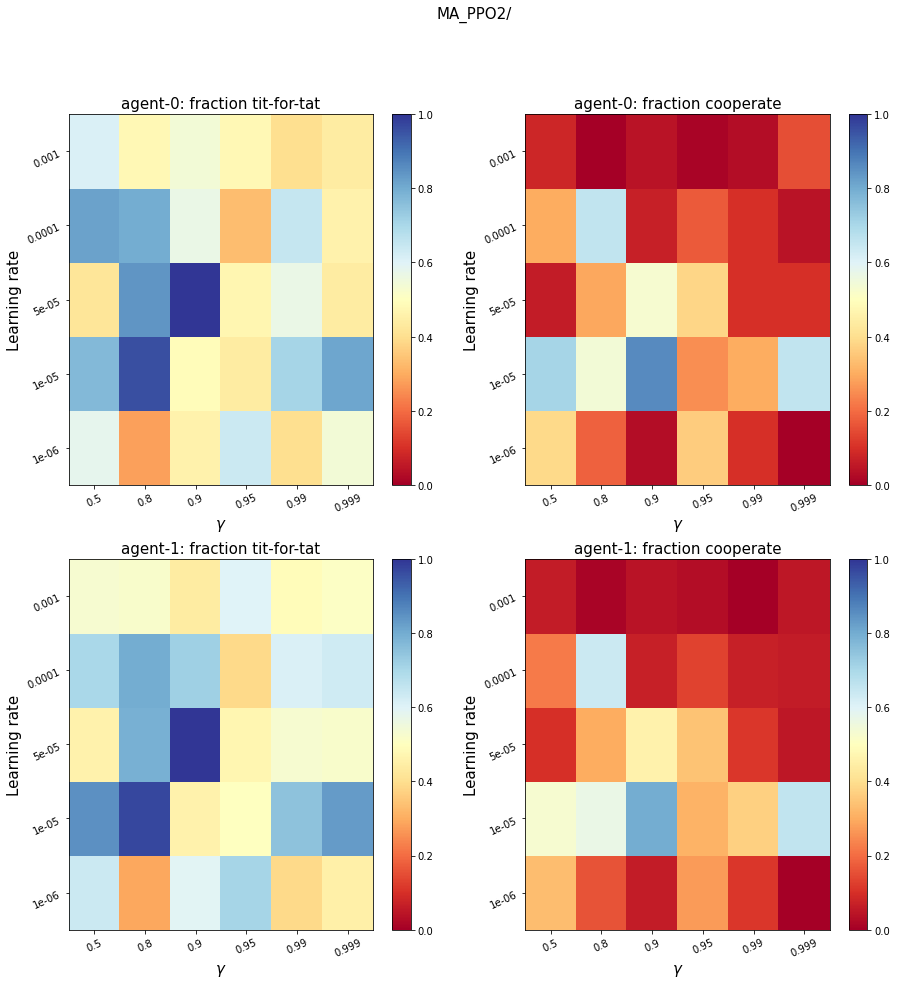

In [38]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

exp_dir = exp_dirs[0]

titles= ['PPO, hiddens=[1024,512,256,32,8]']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_lstm/'
exp_dirs = ['MA_random_length_nodoneatend_PPO2/','MA_random_length_PPO2/', 'MA_PPO3/', 'MA_PPO2/']
exp_dirs = ['MA_PPO2/']

titles= exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
#     print(data1)
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(15,15))

    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


In [13]:
data1

,ID,gamma,lr,episode_reward_max,episode_reward_min,episode_reward_mean


MA_random_length_DQN1_statelen1/
max t4t frac:  0.62
mean t4t frac:  0.502
std t4t frac:  0.045563142999578074
MA_random_length_DQN1_statelen1/
max t4t frac:  0.62
mean t4t frac:  0.504
std t4t frac:  0.05941941321375252
MA_random_length_DQN2_statelen1/
max t4t frac:  0.63
mean t4t frac:  0.5029166666666667
std t4t frac:  0.06399734152464633
MA_random_length_DQN2_statelen1/
max t4t frac:  0.59
mean t4t frac:  0.49333333333333335
std t4t frac:  0.05557777333511023
MA_random_length_nodoneatend_DQN1_statelen5/
max t4t frac:  0.67
mean t4t frac:  0.5075
std t4t frac:  0.06893535619211187
MA_random_length_nodoneatend_DQN1_statelen5/
max t4t frac:  0.55
mean t4t frac:  0.5041666666666667
std t4t frac:  0.03729574000100043
MA_random_length_nodoneatend_DQN2_statelen5/
max t4t frac:  0.59
mean t4t frac:  0.4991666666666667
std t4t frac:  0.05736699593165239
MA_random_length_nodoneatend_DQN2_statelen5/
max t4t frac:  0.64
mean t4t frac:  0.5058333333333334
std t4t frac:  0.058943240117553405
MA_

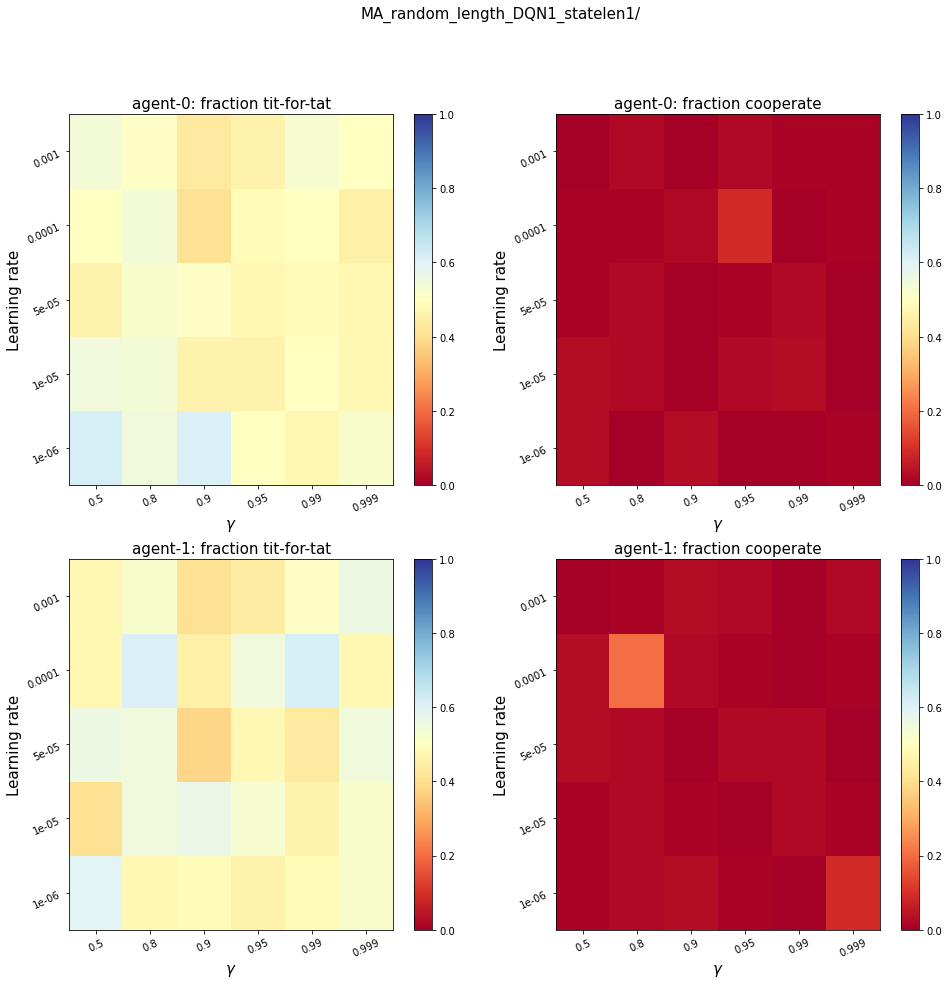

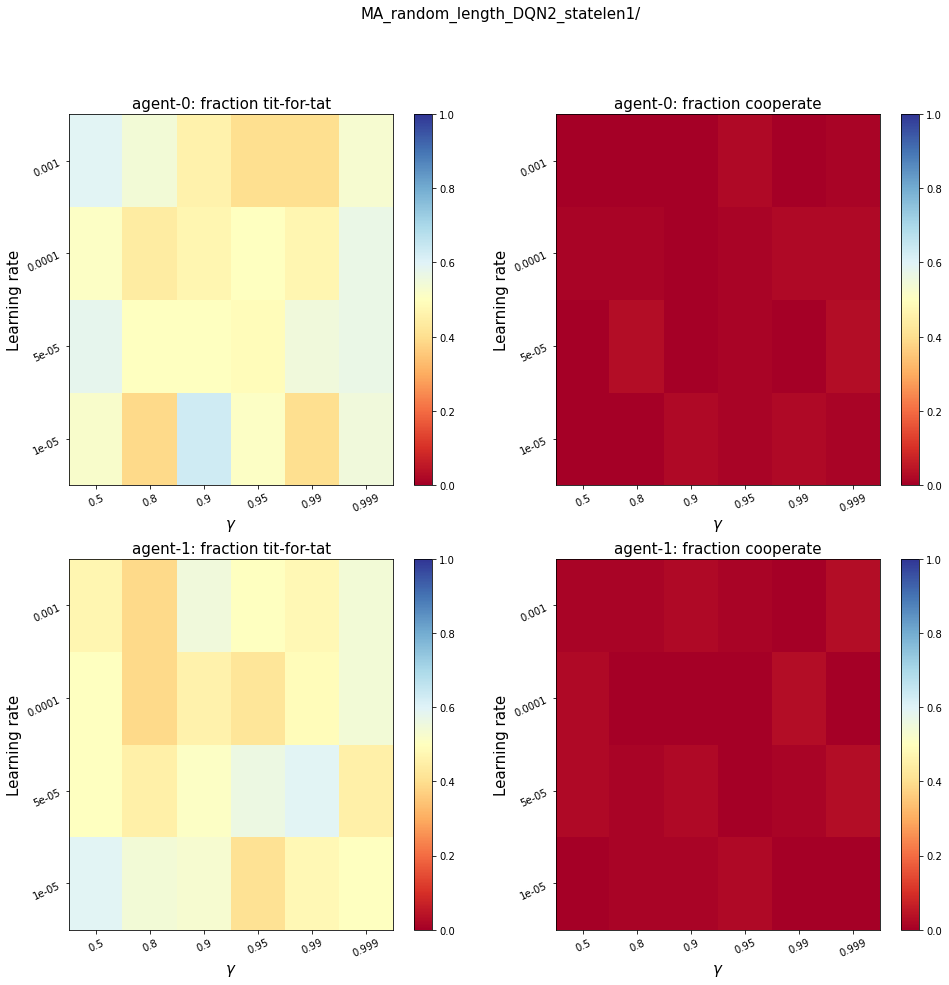

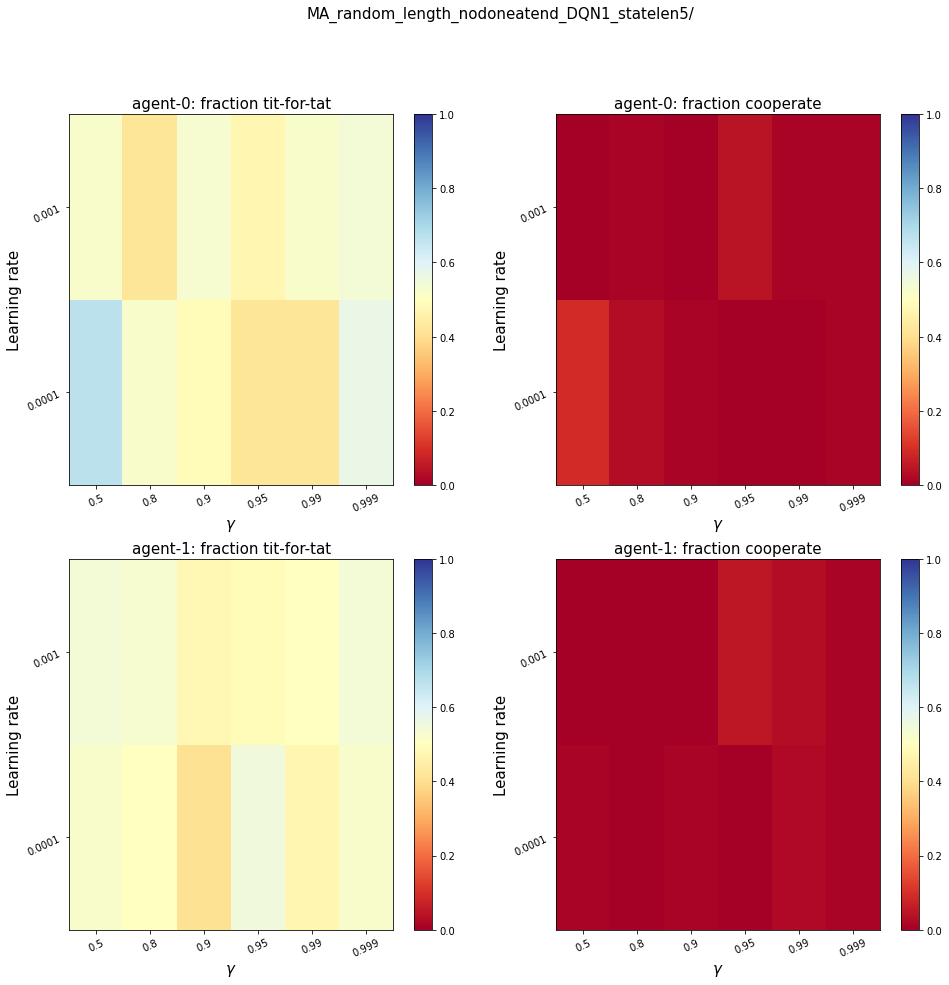

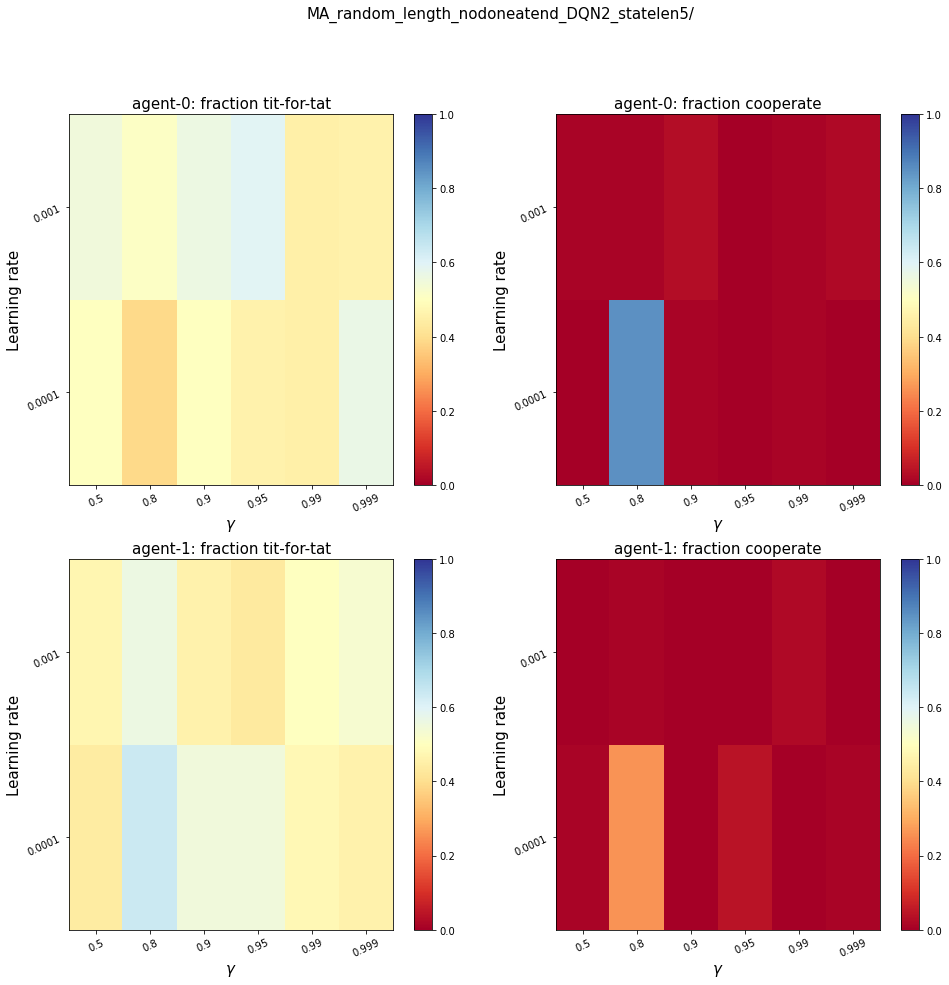

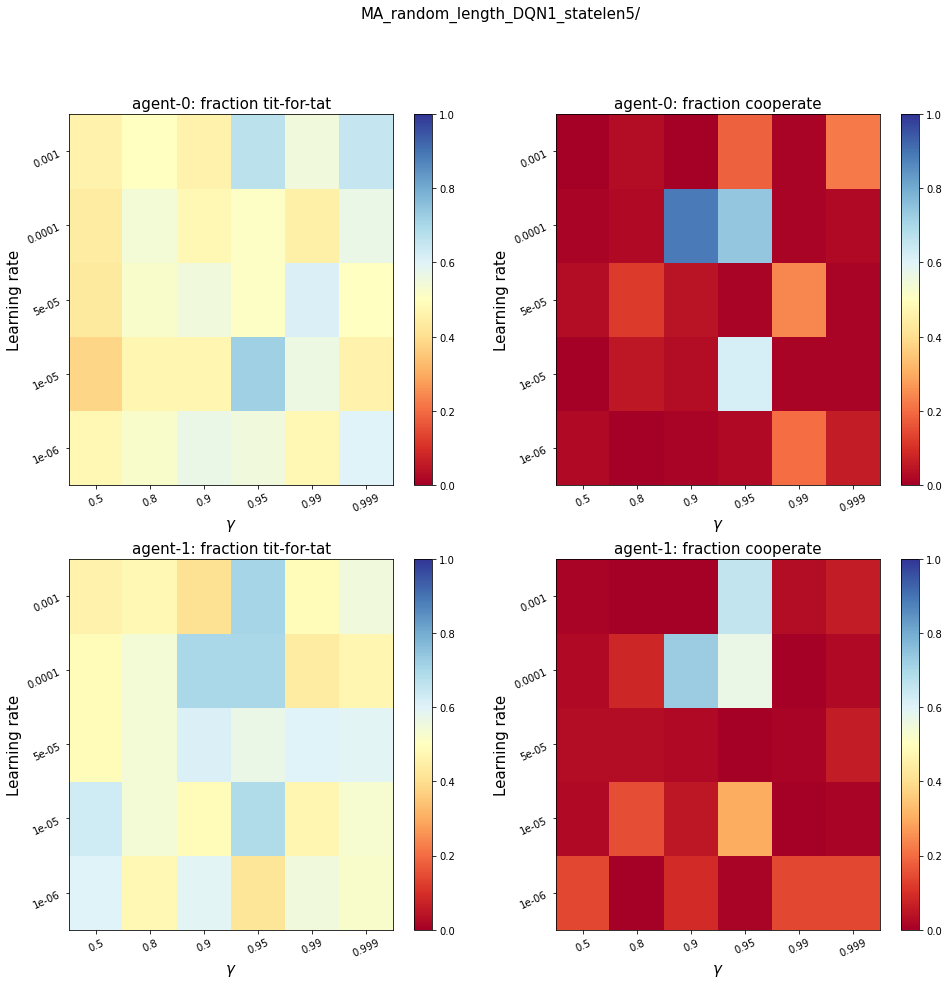

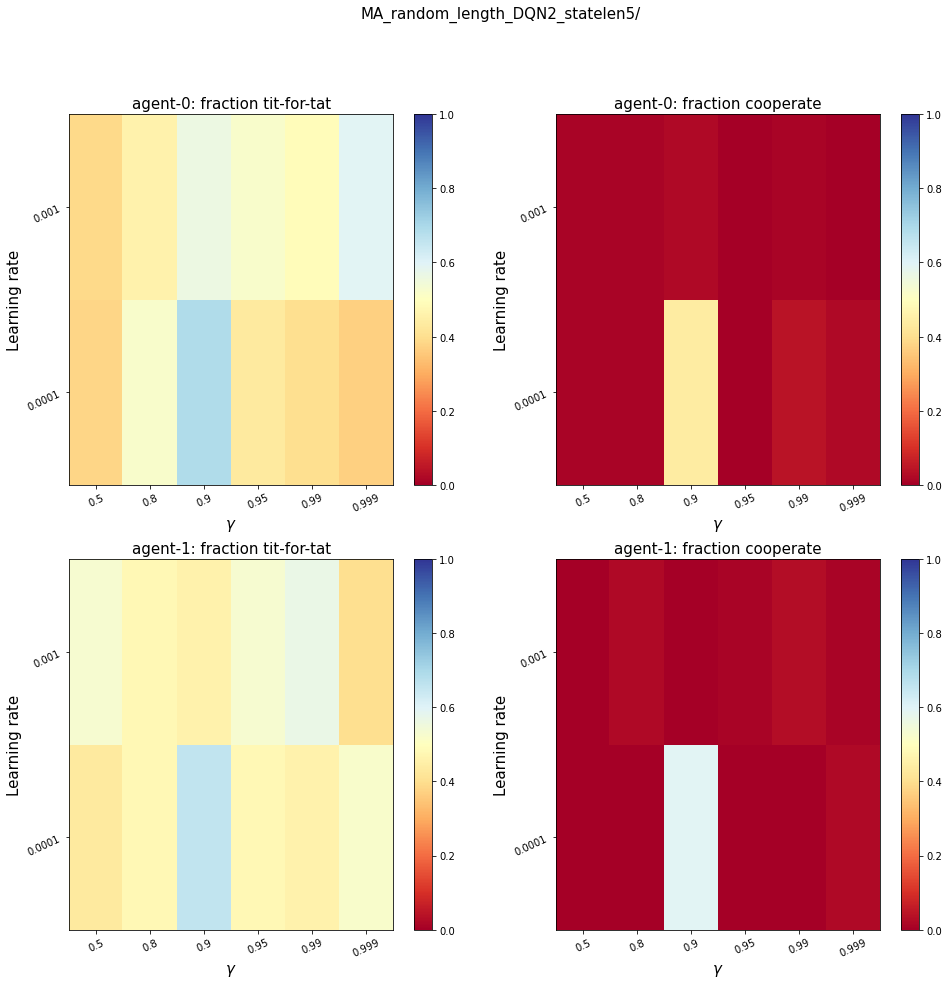

In [36]:
# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/MA_DQN1/',
            '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_no_done_at_end1/MA_DQN_no_done_at_end1/']
exp_dir = exp_dirs[0]
titles= ['DQN, hiddens=[1024,512,256,32,8]']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['MA_random_length_DQN2/', 
            'MA_random_length_nodoneatend_DQN2/']
titles=['DQN, hiddens=[1024,512,256,32,8]', 'DQN, hiddens=[1024,512,256,32,8],no done']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/'
exp_dirs = [
            'MA_random_length_nodoneatend_DQN1_statelen1/',
            'MA_random_length_nodoneatend_DQN2_statelen1/',
            'MA_random_length_DQN1_statelen1/', 
            'MA_random_length_DQN2_statelen1/',
            'MA_random_length_nodoneatend_DQN1_statelen5/',
            'MA_random_length_nodoneatend_DQN2_statelen5/',
            'MA_random_length_DQN1_statelen5/', 
            'MA_random_length_DQN2_statelen5/']

# exp_dirs = ['MA_random_length_DQN1_statelen1/', 'MA_random_length_DQN2_statelen1/',
# #             'MA_random_length_nodoneatend_DQN1_statelen5/','MA_random_length_nodoneatend_DQN2_statelen5/',
#             'MA_random_length_DQN1_statelen5/', 'MA_random_length_DQN2_statelen5/']

titles = exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    if len(data1) ==0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(16,15))

    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25,);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


In [18]:
data1 = pd.read_pickle(base_dir + exp_dir + 'data1_save')


FileNotFoundError: [Errno 2] No such file or directory: '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/MA_random_length_nodoneatend_DQN1_statelen1/data1_save'

In [30]:
len(data1)

0

0
MA_random_length_nodoneatend_PPO1_statelen1/
max t4t frac:  0.57
mean t4t frac:  0.435
std t4t frac:  0.15976545308670456
1
MA_random_length_nodoneatend_PPO1_statelen1/
max t4t frac:  0.59
mean t4t frac:  0.43833333333333335
std t4t frac:  0.1640883908142194
0
MA_random_length_nodoneatend_PPO1_statelen5/
max t4t frac:  0.58
mean t4t frac:  0.50625
std t4t frac:  0.03913784400466298
1
MA_random_length_nodoneatend_PPO1_statelen5/
max t4t frac:  0.62
mean t4t frac:  0.4833333333333334
std t4t frac:  0.056764621219754674
0
MA_random_length_PPO1_statelen1/
max t4t frac:  0.58
mean t4t frac:  0.4916666666666667
std t4t frac:  0.04579543888011363
1
MA_random_length_PPO1_statelen1/
max t4t frac:  0.6
mean t4t frac:  0.5175
std t4t frac:  0.04728019317501428
0
MA_random_length_PPO1_statelen5/
max t4t frac:  0.58
mean t4t frac:  0.49541666666666667
std t4t frac:  0.044439018766044884
1
MA_random_length_PPO1_statelen5/
max t4t frac:  0.61
mean t4t frac:  0.49791666666666673
std t4t frac:  0.057

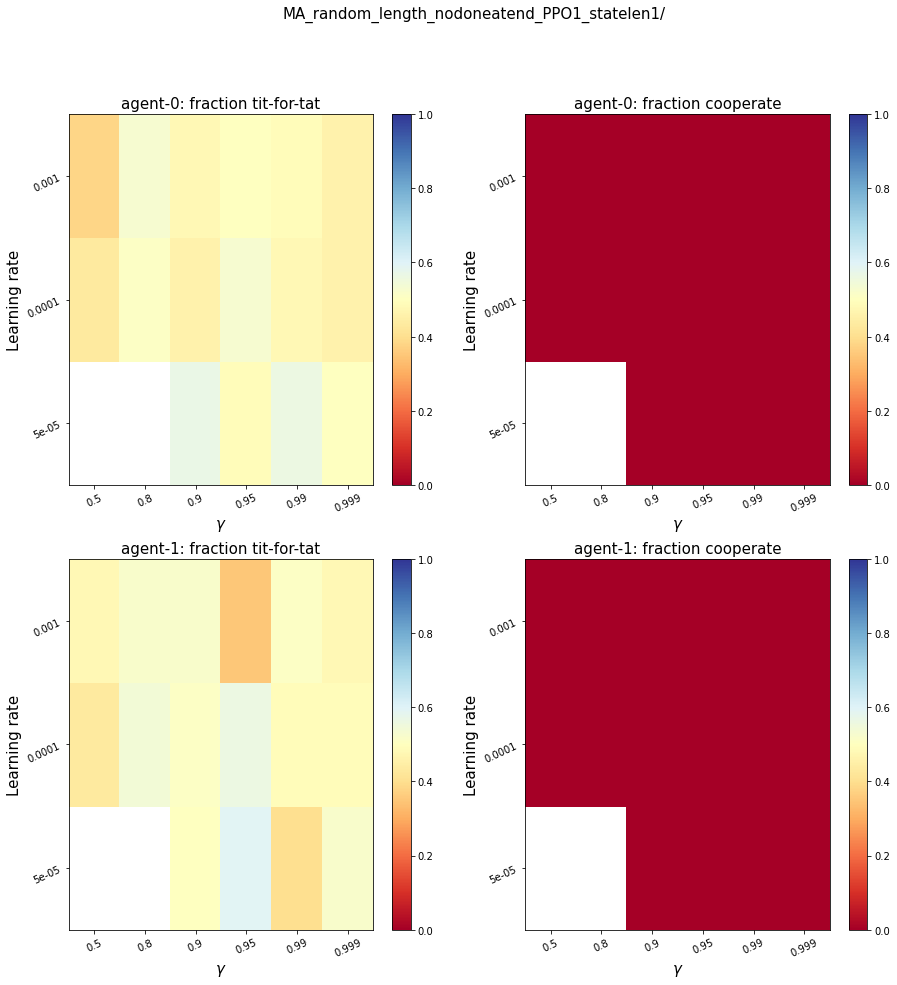

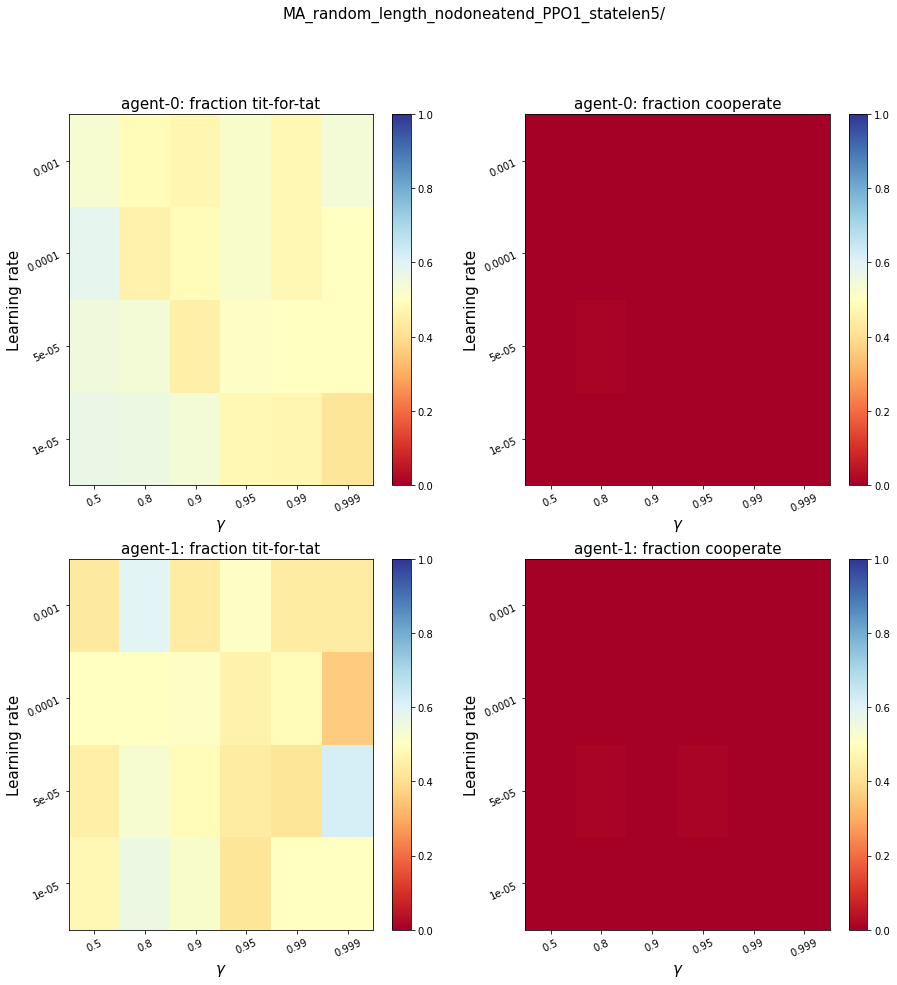

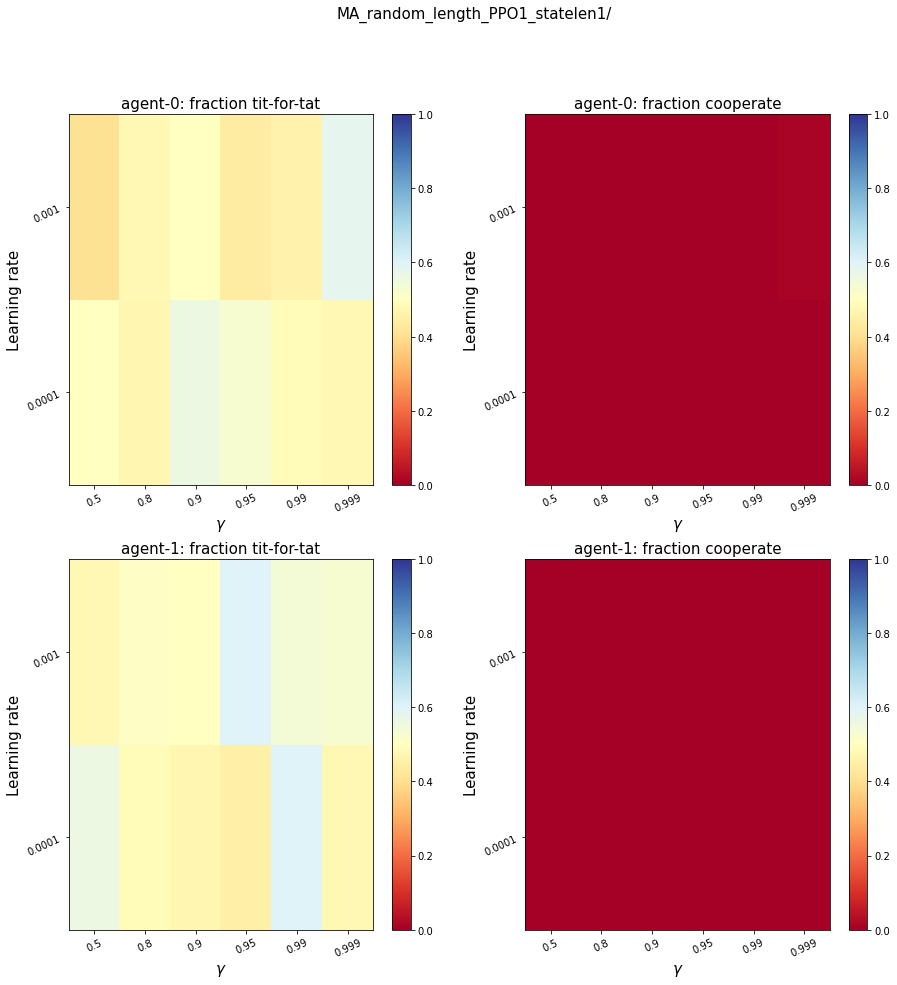

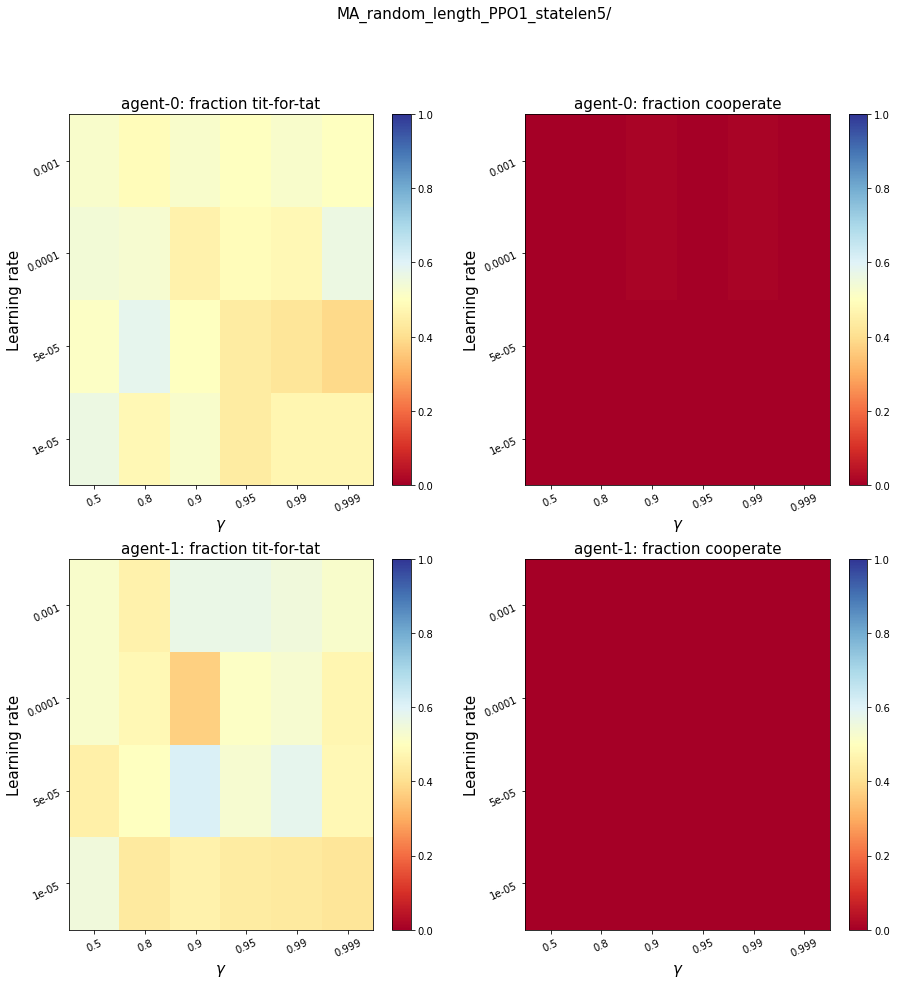

In [37]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

exp_dir = exp_dirs[0]

titles= ['PPO, hiddens=[1024,512,256,32,8]']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_lstm/'
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/'
exp_dirs = ['MA_random_length_nodoneatend_PPO1_statelen1/',
            'MA_random_length_nodoneatend_PPO2_statelen1/',
            'MA_random_length_nodoneatend_PPO1_statelen5/',
            'MA_random_length_nodoneatend_PPO2_statelen5/',
            'MA_random_length_PPO1_statelen1/', 
            'MA_random_length_PPO2_statelen1/',
            'MA_random_length_PPO1_statelen5/', 
            'MA_random_length_PPO2_statelen5/'
            ]


titles= exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
#     print(data1)
    if len(data1) == 0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(15,15))

    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))
